In [1]:
% matplotlib inline

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import sem, ttest_ind

In [78]:
pd.options.display.max_rows = 500

In [39]:
mri_df = pd.read_csv('oasis_longitudinal_shishir.csv')
mri_df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [34]:
# drop NAN
mri_df_drop_nan = mri_df.dropna(how='any')
mri_df_drop_nan.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [60]:
grouped_distinct = mri_df_drop_nan.groupby(['Subject ID', 'M/F']).count().reset_index()
grouped_distinct.head()

,Subject ID,M/F,MRI ID,Group,Visit,MR Delay,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,M,2,2,2,2,2,2,2,2,2,2,2,2,2
1,OAS2_0004,F,2,2,2,2,2,2,2,2,2,2,2,2,2
2,OAS2_0005,M,3,3,3,3,3,3,3,3,3,3,3,3,3
3,OAS2_0008,F,2,2,2,2,2,2,2,2,2,2,2,2,2
4,OAS2_0009,M,2,2,2,2,2,2,2,2,2,2,2,2,2


In [44]:
grouped_distinct_count_gender = grouped_distinct.groupby(['M/F']).count()
gender_count_df = grouped_distinct_count_gender.reset_index()[['Subject ID', 'M/F']]
gender_count_df = gender_count_df.rename(columns = {'Subject ID' : 'Gender Count'})
gender_count_df = gender_count_df.set_index(['M/F'])
gender_count_df

,Gender Count
M/F,
F,84
M,58


<BarContainer object of 2 artists>

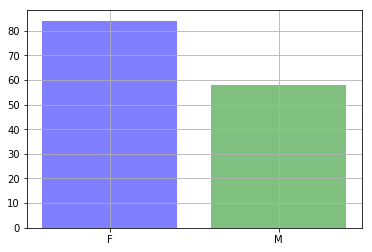

In [59]:
gender_bar_x_axis = gender_count_df.index
plt.grid()
plt.bar(gender_bar_x_axis, gender_count_df['Gender Count'], alpha=0.5, align="center", color = ['b','g'])

In [61]:
# By group count
grouped_distinct_count_gender = grouped_distinct.groupby(['M/F']).count()
gender_count_df = grouped_distinct_count_gender.reset_index()[['Subject ID', 'M/F']]
gender_count_df = gender_count_df.rename(columns = {'Subject ID' : 'Gender Count'})
gender_count_df = gender_count_df.set_index(['M/F'])
gender_count_df

,Subject ID,MRI ID,Group,Visit,MR Delay,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
M/F,,,,,,,,,,,,,,
F,84,84,84,84,84,84,84,84,84,84,84,84,84,84
M,58,58,58,58,58,58,58,58,58,58,58,58,58,58


In [81]:
grouped_group = mri_df_drop_nan.groupby(['Subject ID', 'Group']).count().reset_index()
grouped_distinct_count_group = grouped_group.groupby(['Group']).count()
group_count_df = grouped_distinct_count_group.reset_index()[['Subject ID', 'Group']]
group_count_df = group_count_df.rename(columns = {'Subject ID' : 'Group Count'})
group_count_df = group_count_df.set_index(['Group'])
group_count_df

,Group Count
Group,
Converted,14
Demented,56
Nondemented,72


<BarContainer object of 3 artists>

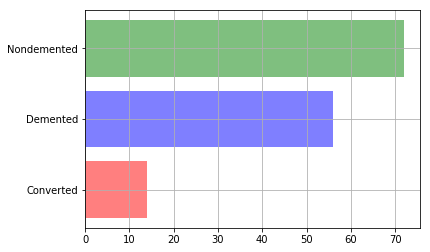

In [85]:
group_bar_x_axis = group_count_df.index
plt.grid()
plt.barh(group_bar_x_axis, group_count_df['Group Count'], alpha=0.5, align="center", color = ['r','b','g'])

In [ ]:
bins = 